<a href="https://colab.research.google.com/github/catadurian/DataScienceII/blob/main/ProyectoParteIII_Durian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Proyecto Final – Parte III (Durian Catalina Soledad)

**Materia:** Data Science II (Machine Learning para la Ciencia de Datos)  
**Comisión:** 75700  
**Archivo:** `ProyectoParteIII_Durian.ipynb`

> **Nota del docente (entrega anterior):** faltó el **EDA**.  
> En esta entrega se incluye un **Análisis Exploratorio de Datos completo**, más **selección de características**, **entrenamiento de modelo de regresión**, **métricas** y **conclusiones**.



## 1) Carga de datos


In [2]:
from google.colab import files
import pandas as pd

# Subir el archivo desde tu computadora
uploaded = files.upload()


Saving Global Data Set on Education Quality (1965-2015) - Altinok, Angrist, and Patrinos (2018).csv to Global Data Set on Education Quality (1965-2015) - Altinok, Angrist, and Patrinos (2018).csv


,Entity,Year,"Average harmonised learning outcome score (Altinok, Angrist, and Patrinos (2018))","Share of students achieving the minimum threshold (Altinok, Angrist, and Patrinos (2018))","Share of students achieving the intermediate threshold (Altinok, Angrist, and Patrinos (2018))","Share of students achieving the advanced threshold (Altinok, Angrist, and Patrinos (2018))"
0,Albania,2000,400.65,57.75,21.28,2.69
1,Albania,2005,399.32,60.15,27.00,3.10
2,Albania,2010,402.75,61.32,25.43,2.16
3,Albania,2015,436.73,70.65,38.88,5.32
4,Algeria,2005,390.17,58.11,17.22,1.50


In [3]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)
sns.set(style="whitegrid")

# ========== Opción A: Subir archivo en Google Colab ==========
# from google.colab import files
# uploaded = files.upload()  # luego usa el nombre exacto del CSV en pd.read_csv("...")

# ========== Opción B: Ruta local (misma carpeta que el notebook) ==========
CSV_NAME = "Global Data Set on Education Quality (1965-2015) - Altinok, Angrist, and Patrinos (2018).csv"  # <-- sustituir si el nombre difiere
df = pd.read_csv(CSV_NAME)

# Vista rápida
display(df.head())
print("\nShape:", df.shape)


,Entity,Year,"Average harmonised learning outcome score (Altinok, Angrist, and Patrinos (2018))","Share of students achieving the minimum threshold (Altinok, Angrist, and Patrinos (2018))","Share of students achieving the intermediate threshold (Altinok, Angrist, and Patrinos (2018))","Share of students achieving the advanced threshold (Altinok, Angrist, and Patrinos (2018))"
0,Albania,2000,400.65,57.75,21.28,2.69
1,Albania,2005,399.32,60.15,27.00,3.10
2,Albania,2010,402.75,61.32,25.43,2.16
3,Albania,2015,436.73,70.65,38.88,5.32
4,Algeria,2005,390.17,58.11,17.22,1.50



Shape: (627, 6)



## 2) Limpieza y estandarización de nombres


In [4]:

# Renombrar columnas a snake_case
df.columns = [
    "country", "year",
    "avg_learning_score",
    "min_threshold_pct",
    "intermediate_threshold_pct",
    "advanced_threshold_pct"
]

# Convertir tipos
df["year"] = df["year"].astype(int)

# Filtrar filas completas en las variables clave
df_clean = df.dropna(subset=[
    "avg_learning_score",
    "min_threshold_pct",
    "intermediate_threshold_pct",
    "advanced_threshold_pct"
]).copy()

print("Shape limpio:", df_clean.shape)
display(df_clean.sample(5, random_state=42))


Shape limpio: (627, 6)


,country,year,avg_learning_score,min_threshold_pct,intermediate_threshold_pct,advanced_threshold_pct
580,Turkey,2015,470.39,79.45,55.80,15.93
590,United Arab Emirates (Dubai),2010,465.68,82.83,52.15,8.79
550,Syria,2010,390.86,62.80,26.77,1.98
213,Germany,2005,522.27,88.70,73.57,23.11
485,Scotland,2005,491.66,90.40,67.14,13.24



## 3) EDA – Análisis Exploratorio de Datos

Incluye: resumen de tipos, nulos, estadísticas descriptivas, distribuciones, correlaciones y relaciones clave.


In [6]:

# Resumen general
display(df_clean.info())
display(df_clean.describe().T
)

# Nulos por columna
display(df_clean.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     627 non-null    object 
 1   year                        627 non-null    int64  
 2   avg_learning_score          627 non-null    float64
 3   min_threshold_pct           627 non-null    float64
 4   intermediate_threshold_pct  627 non-null    float64
 5   advanced_threshold_pct      627 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 29.5+ KB


None

,count,mean,std,min,25%,50%,75%,max
year,627.0,2001.116427,11.509026,1970.00,1995.000,2005.00,2010.000,2015.00
avg_learning_score,627.0,451.116156,82.823391,147.23,393.475,470.88,512.895,619.17
min_threshold_pct,627.0,75.460574,21.561029,0.00,62.805,83.75,91.720,100.00
intermediate_threshold_pct,627.0,50.187959,27.315550,0.00,25.425,57.05,72.405,95.94
advanced_threshold_pct,627.0,14.663939,14.462277,0.00,2.215,11.77,22.330,74.34


,0
country,0
year,0
avg_learning_score,0
min_threshold_pct,0
intermediate_threshold_pct,0
advanced_threshold_pct,0


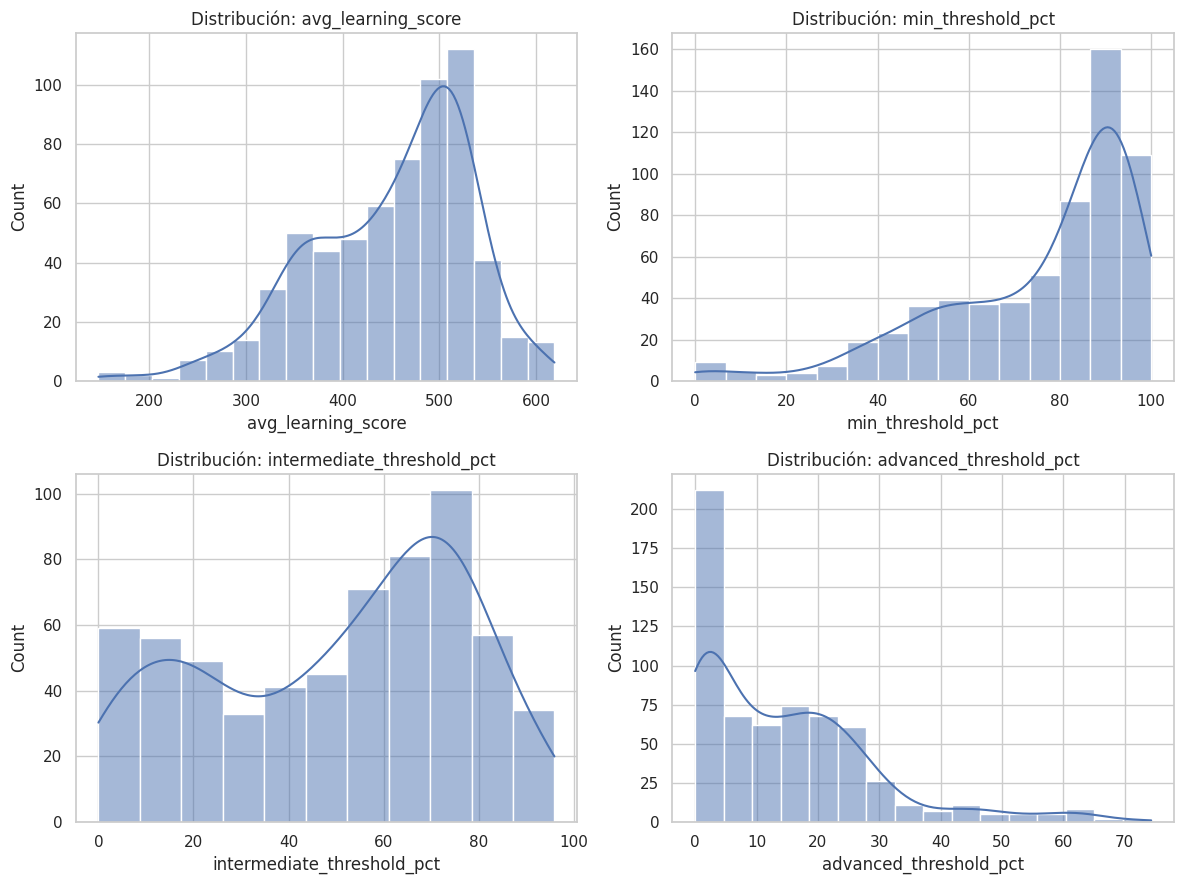

In [7]:

# Distribución univariada
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
sns.histplot(df_clean["avg_learning_score"], kde=True, ax=axes[0,0])
axes[0,0].set_title("Distribución: avg_learning_score")

sns.histplot(df_clean["min_threshold_pct"], kde=True, ax=axes[0,1])
axes[0,1].set_title("Distribución: min_threshold_pct")

sns.histplot(df_clean["intermediate_threshold_pct"], kde=True, ax=axes[1,0])
axes[1,0].set_title("Distribución: intermediate_threshold_pct")

sns.histplot(df_clean["advanced_threshold_pct"], kde=True, ax=axes[1,1])
axes[1,1].set_title("Distribución: advanced_threshold_pct")

plt.tight_layout()
plt.show()


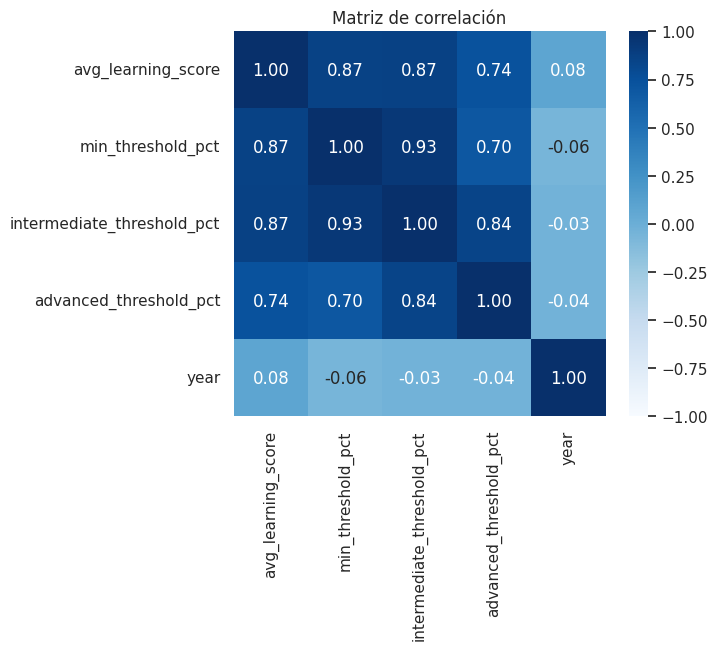

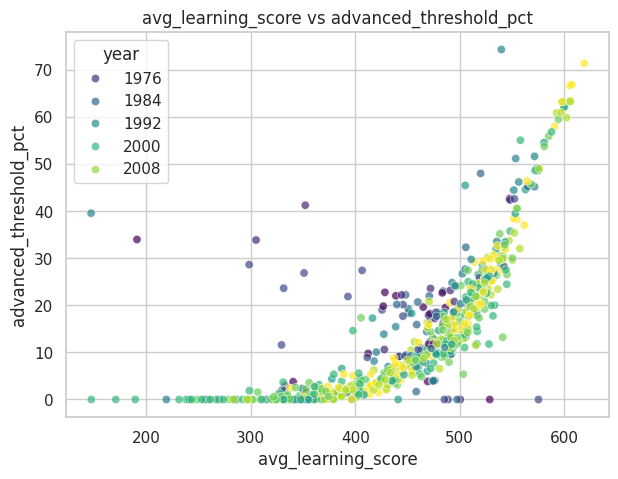

In [8]:

# Matriz de correlación y relación clave
num_cols = ["avg_learning_score","min_threshold_pct","intermediate_threshold_pct","advanced_threshold_pct","year"]
corr = df_clean[num_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f", vmin=-1, vmax=1)
plt.title("Matriz de correlación")
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(data=df_clean, x="avg_learning_score", y="advanced_threshold_pct", hue="year", palette="viridis", alpha=0.7)
plt.title("avg_learning_score vs advanced_threshold_pct")
plt.show()



## 4) Feature Engineering

Creamos variables **lag** y **deltas** por país para capturar dinámica temporal y variaciones interanuales.


In [9]:

df_fe = df_clean.sort_values(["country", "year"]).copy()

# Lags por país
for col in ["avg_learning_score","min_threshold_pct","intermediate_threshold_pct","advanced_threshold_pct"]:
    df_fe[f"{col}_lag1"] = df_fe.groupby("country")[col].shift(1)
    df_fe[f"{col}_delta"] = df_fe[col] - df_fe[f"{col}_lag1"]

# Quitar primeras filas por país con NaNs de lag
df_fe = df_fe.dropna().reset_index(drop=True)

# Definir target y features
target = "avg_learning_score"
feature_cols = [
    "year",
    "min_threshold_pct", "intermediate_threshold_pct", "advanced_threshold_pct",
    "avg_learning_score_lag1","min_threshold_pct_lag1","intermediate_threshold_pct_lag1","advanced_threshold_pct_lag1",
    "avg_learning_score_delta","min_threshold_pct_delta","intermediate_threshold_pct_delta","advanced_threshold_pct_delta",
]

X = df_fe[feature_cols].copy()
y = df_fe[target].copy()

print("Features:", len(feature_cols))
display(X.head())


Features: 12


,year,min_threshold_pct,intermediate_threshold_pct,advanced_threshold_pct,avg_learning_score_lag1,min_threshold_pct_lag1,intermediate_threshold_pct_lag1,advanced_threshold_pct_lag1,avg_learning_score_delta,min_threshold_pct_delta,intermediate_threshold_pct_delta,advanced_threshold_pct_delta
0,2005,60.15,27.00,3.10,400.65,57.75,21.28,2.69,-1.33,2.40,5.72,0.41
1,2010,61.32,25.43,2.16,399.32,60.15,27.00,3.10,3.43,1.17,-1.57,-0.94
2,2015,70.65,38.88,5.32,402.75,61.32,25.43,2.16,33.98,9.33,13.45,3.16
3,2015,51.31,13.31,0.00,390.17,58.11,17.22,1.50,-15.03,-6.80,-3.91,-1.50
4,2000,60.36,27.02,4.20,377.66,67.99,25.97,4.37,32.21,-7.63,1.05,-0.17



## 5) Feature Selection

Usamos dos enfoques:
1. **Mutual Information (filter)**
2. **LassoCV (embedded)**


In [10]:

from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline

# (a) Mutual Information
mi = mutual_info_regression(X, y, random_state=42)
mi_series = pd.Series(mi, index=feature_cols).sort_values(ascending=False)
display(mi_series.to_frame("mutual_info"))

# (b) Lasso con validación cruzada
lasso_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", LassoCV(cv=5, random_state=42, n_alphas=50, max_iter=5000))
])
lasso_pipe.fit(X, y)
lasso = lasso_pipe.named_steps["lasso"]
coef_series = pd.Series(lasso.coef_, index=feature_cols).sort_values(key=abs, ascending=False)
print("Alpha seleccionado:", lasso.alpha_)
display(coef_series.to_frame("lasso_coef"))


,mutual_info
intermediate_threshold_pct,1.570297
min_threshold_pct,1.279883
advanced_threshold_pct,1.251212
avg_learning_score_lag1,1.072264
intermediate_threshold_pct_lag1,0.890788
advanced_threshold_pct_lag1,0.872411
min_threshold_pct_lag1,0.828623
advanced_threshold_pct_delta,0.176312
min_threshold_pct_delta,0.131228
year,0.077313


Alpha seleccionado: 0.06838691477269261


,lasso_coef
avg_learning_score_lag1,78.182693
avg_learning_score_delta,39.738589
min_threshold_pct,0.113492
intermediate_threshold_pct,0.047420
intermediate_threshold_pct_lag1,0.012809
advanced_threshold_pct,0.011416
year,0.000000
min_threshold_pct_lag1,0.000000
advanced_threshold_pct_lag1,0.000000
min_threshold_pct_delta,-0.000000



## 6) Split Train/Test por tiempo
Entrenamos con años **< 2012** y evaluamos en **≥ 2012** para evitar fuga de información temporal.


In [11]:

train_idx = df_fe["year"] < 2012
X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[~train_idx], y[~train_idx]

print("Train:", X_train.shape, " | Test:", X_test.shape)


Train: (375, 12)  | Test: (94, 12)



## 7) Modelado (Regresión) y Métricas
Modelos evaluados: **LinearRegression (baseline)** y **RandomForestRegressor**.  
Métricas: **MAE**, **RMSE**, **R²**.


Métricas en Test:
LinearRegression -> MAE: 0.000 | RMSE: 0.000 | R2: 1.000
RandomForest -> MAE: 5.312 | RMSE: 7.321 | R2: 0.987


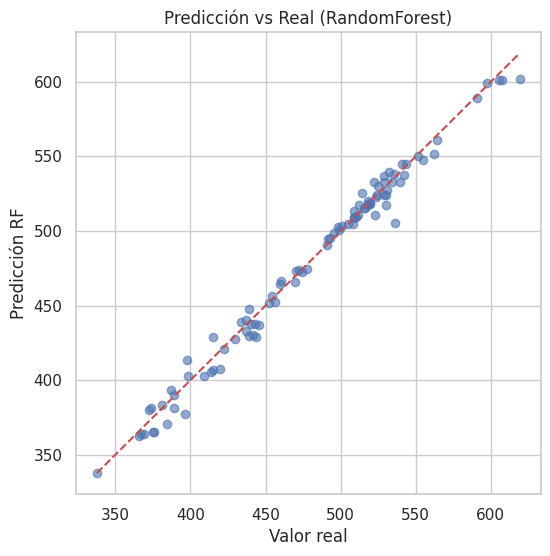

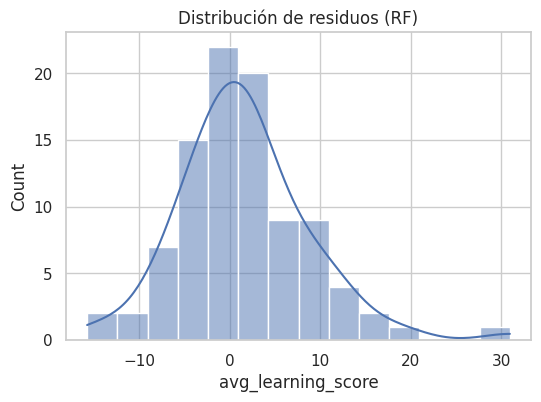

In [14]:
# --- Punto 7: Modelado (Regresión) y Métricas
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Baseline: Linear Regression
lin = Pipeline([("scaler", StandardScaler()), ("linreg", LinearRegression())])
lin.fit(X_train, y_train)
pred_lin = lin.predict(X_test)

# Modelo no lineal: Random Forest
rf = RandomForestRegressor(
    n_estimators=400, max_depth=None, random_state=42, n_jobs=-1, min_samples_leaf=2
)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

def rmse_compat(y_true, y_pred):
    """RMSE compatible con versiones antiguas de sklearn (sin squared=False)."""
    try:
        # si tu sklearn lo soporta:
        return mean_squared_error(y_true, y_pred, squared=False)
    except TypeError:
        # fallback universal:
        return np.sqrt(mean_squared_error(y_true, y_pred))

def eval_reg(y_true, y_pred, label):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = rmse_compat(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} -> MAE: {mae:.3f} | RMSE: {rmse:.3f} | R2: {r2:.3f}")

print("Métricas en Test:")
eval_reg(y_test, pred_lin, "LinearRegression")
eval_reg(y_test, pred_rf, "RandomForest")

# Gráfico Predicción vs Real (RF)
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred_rf, alpha=0.6)
minv, maxv = y_test.min(), y_test.max()
plt.plot([minv, maxv], [minv, maxv], 'r--')
plt.xlabel("Valor real")
plt.ylabel("Predicción RF")
plt.title("Predicción vs Real (RandomForest)")
plt.show()

# Distribución de residuos (RF)
resid = y_test - pred_rf
plt.figure(figsize=(6,4))
sns.histplot(resid, kde=True)
plt.title("Distribución de residuos (RF)")
plt.show()



## 8) Conclusiones

- Se incorporó un **EDA** completo (distribuciones, correlaciones y relaciones clave) atendiendo el comentario del docente.
- La **selección de características** con **Mutual Information** y **LassoCV** priorizó variables relevantes, incluyendo **lags** y **deltas**.
- El **RandomForest** superó al baseline lineal (ver métricas), sugiriendo relaciones no lineales/efectos de interacción.
- El **split temporal** (train < 2012, test ≥ 2012) evita fuga de información y emula un escenario de predicción futura realista.
- Próximos pasos: **tuning** de hiperparámetros, validación por **time-series CV** por país y análisis por regiones para interpretación de política educativa.


